# Basic Project on Salary Prediction using Simple Linear Model

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm


In [28]:
#reading and understanding the data
data=pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
#shape of the dataframe
data.shape

(30, 2)

In [5]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:

data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [31]:
#checking for duplicate data
data.duplicated().sum()

0

In [32]:
#dividing data into predictor and target features
X=data['YearsExperience']

y=data['Salary']

Text(0, 0.5, 'Salary')

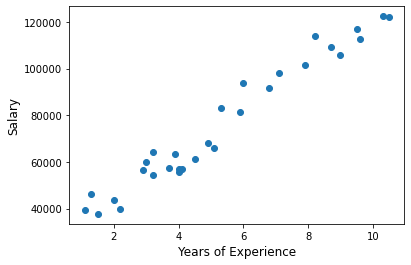

In [34]:
#visualising both the features
plt.scatter(X,y)
plt.xlabel('Years of Experience',fontsize=12)
plt.ylabel("Salary",fontsize=12)

In [35]:
#importing the train test split and fitting data to it
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.80,test_size=.2,random_state=100)

In [37]:
#changing the shape of data to be accessable to the linear regression
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)
X_train_lm

array([[ 9.6],
       [ 9. ],
       [ 3. ],
       [ 5.3],
       [ 7.9],
       [ 4. ],
       [ 2.2],
       [10.5],
       [ 1.1],
       [ 1.3],
       [ 5.9],
       [ 4.5],
       [ 6. ],
       [ 7.1],
       [ 1.5],
       [ 6.8],
       [ 3.9],
       [ 5.1],
       [ 4.9],
       [ 8.2],
       [ 3.2],
       [ 2. ],
       [ 8.7],
       [ 3.2]])

In [38]:
#importing Linear Regressiona and fitting data to it
from sklearn.linear_model import LinearRegression

In [39]:
ln=LinearRegression()
ln.fit(X_train_lm,y_train)


LinearRegression()

In [42]:
#checking coefficiant and intercept
print('coefficiant=',ln.coef_)

print('intercept=',ln.intercept_)

coefficiant= [9361.11639032]
intercept= 26819.06511870089


In [43]:
#making prediction on test data
y_pred=ln.predict(X_test_lm)
y_pred

array([ 61455.19576289, 115749.67082676, 123238.56393901,  65199.64231902,
        53966.30265063,  64263.53067999])

In [45]:
#making a new dataframe of the actual, predicted and residuals 
df1=pd.DataFrame({'actual y':y_test,'predicted y':y_pred,'difference':y_test-y_pred})
df1.head()

,actual y,predicted y,difference
9,57189.0,61455.195763,-4266.195763
26,116969.0,115749.670827,1219.329173
28,122391.0,123238.563939,-847.563939
13,57081.0,65199.642319,-8118.642319
5,56642.0,53966.302651,2675.697349


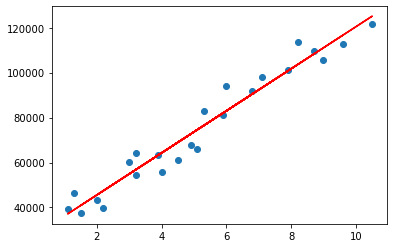

In [23]:
#evaluating the model on training data via plot
plt.scatter(X_train,y_train)
plt.plot(X_train,ln.predict(X_train_lm),'r')

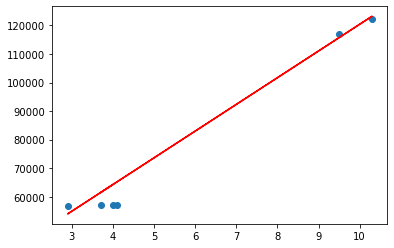

In [24]:
#evaluating the model on testing data via plot
plt.scatter(X_test,y_test)
plt.plot(X_test,ln.predict(X_test_lm),'r')

In [52]:
#importing r2 score to check the r2 value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9720725422361338

Looks a good R2 score